In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Helvetica Neue'

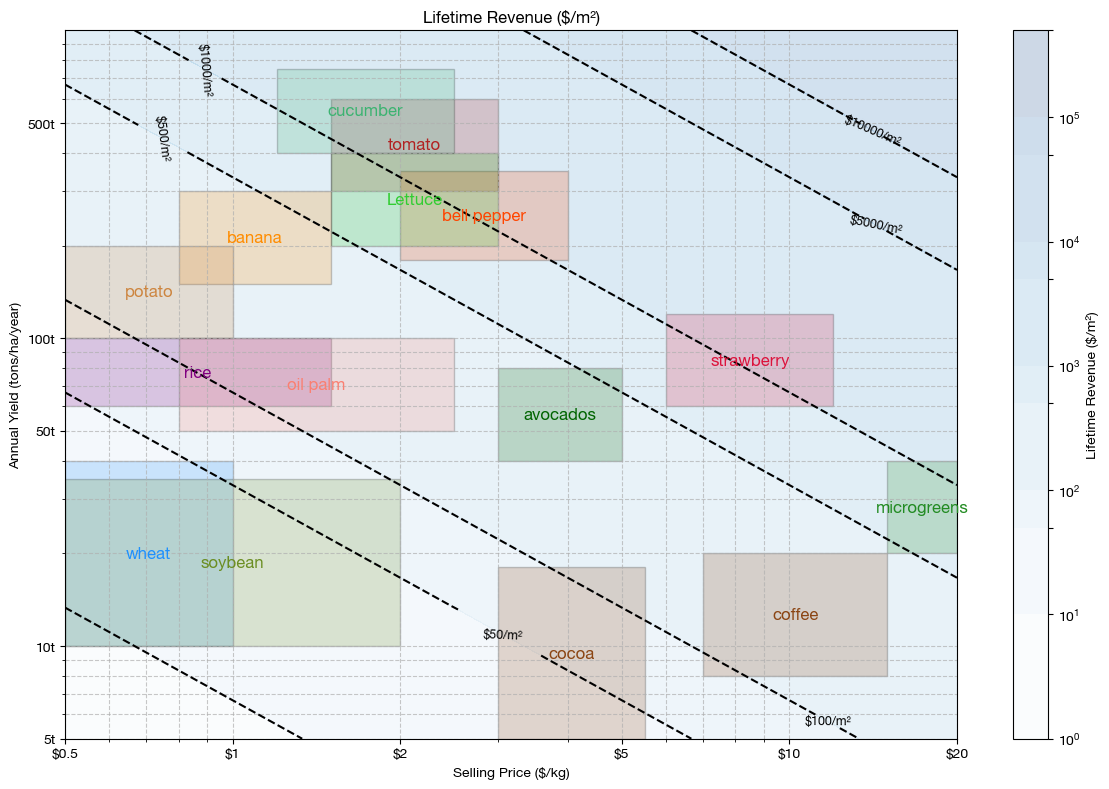

In [175]:
mode = "log"

boxes = [
  {
    "price": [1.5, 3],
    "yield": [300, 600],
    "color": "firebrick",
    "name": "tomato"
  },
  {
    "name": "cucumber",
    "price": [1.2, 2.5],
    "yield": [400, 750],
    "color": "mediumseagreen"
  },
  {
    "name": "bell pepper",
    "price": [2, 4],
    "yield": [180, 350],
    "color": "orangered"
  },
  {
    "name": "Lettuce",
    "price": [1.5, 3],
    "yield": [200, 400],
    "color": "limegreen"
  },
  {
    "name": "strawberry",
    "price": [6, 12],
    "yield": [60, 120],
    "color": "crimson"
  },
  {
    "name": "microgreens",
    "price": [15, 20],
    "yield": [20, 40],
    "color": "forestgreen"
  },
  {
    "name": "coffee",
    "price": [7, 15],
    "yield": [8, 20],
    "color": "saddlebrown"
  },
  {
    "name": "avocados",
    "price": [3, 5],
    "yield": [40, 80],
    "color": "darkgreen"
  },
  {
    "name": "banana",
    "price": [0.8, 1.5],
    "yield": [150, 300],
    "color": "darkorange"
  },
  {
    "name": "cocoa",
    "price": [3, 5.5],
    "yield": [5, 18],
    "color": "saddlebrown"
  },
  # {
  #   "name": "raspberry",
  #   "price": [15, 25],
  #   "yield": [25, 45],
  #   "color": "purple"
  # },
  {
    "name": "rice",
    "price": [0.5, 1.5],
    "yield": [60, 100],
    "color": "purple"
  },
  {
    "name": "wheat",
    "price": [0.5, 1],
    "yield": [10, 40],
    "color": "dodgerblue"
  },
  {
    "name": "potato",
    "price": [0.5, 1],
    "yield": [100, 200],
    "color": "peru"
  },
  {
    "name": "soybean",
    "price": [0.5, 2],
    "yield": [10, 35],
    "color": "olivedrab"
  },
  {
    "name": "oil palm",
    "price": [0.8, 2.5],
    "yield": [50, 100],
    "color": "salmon"
  },
  # {
  #   "name": "sugarcane",
  #   "price": [0.5, 1],
  #   "yield": [100, 180],
  #   "color": "gray"
  # }
]

# Create arrays for yield and price
if mode == "log":
  # yields = np.logspace(0, 3, 100)  # Yield from 1 to 1000 tons/ha
  # prices = np.logspace(-1, 1, 100) # Price from 1 to 100 $/kg
  yields = np.linspace(5, 1000, 100)  # Yield from 5 to 500 tons/ha
  prices = np.linspace(0.5, 20, 100)   # Price from 0.1
  levels = np.array([
    1, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000
  ])
else:
  yields = np.linspace(0, 100, 100)  # Yield from 0 to 100 tons/ha
  prices = np.linspace(0, 10, 100)   # Price from 0 to 10 $/kg
  levels = np.linspace(0, 100, 10)  # Revenue levels from 0 to 100 $/m²

# Create mesh grid
X, Y = np.meshgrid(prices, yields)

# Calculate revenue ($/m²)
# Convert tons/ha to kg/m²: 1 ton/ha = 0.1 kg/m²
lifetime_years = 15
tons_per_Ha_to_kg_per_m2 = 0.1
revenue = X * (Y * tons_per_Ha_to_kg_per_m2) * lifetime_years

# Create contour plot
plt.figure(figsize=(12, 8))
cp = plt.contour(X, Y, revenue, levels=levels, colors='black', linestyles='dashed')
plt.clabel(cp, inline=True, fontsize=9, fmt='$%1.0f/m²')

# Add color fill between contours
plt.contourf(X, Y, revenue, levels=levels, cmap='Blues', alpha=0.2, locator=plt.LogLocator())
colorbar = plt.colorbar(label='Lifetime Revenue ($/m²)')

if mode == "log":
  # colorbar.set_ticks(np.logspace(0, 2, 4))  # Set nice tick locations
  colorbar.set_ticks(levels)  # Set nice tick locations

# Set logarithmic scales
if mode == "log":
  plt.xscale('log')
  plt.yscale('log')
  plt.xticks([0.5, 1, 2, 5, 10, 20], ['$0.5', '$1', '$2', '$5', '$10', '$20'])
  plt.yticks([5, 10, 50, 100, 500], ['5t', '10t', '50t', '100t', '500t'])

  # Add a $ sign to the x ticks:
  # plt.gca().xaxis.set_major_formatter(lambda x, pos: f'${{{int(x)}}}')

# Add a box on the plot
for box in boxes:
  box_x_range = box["price"]
  box_y_range = box["yield"]
  rect = plt.Rectangle(
    (box_x_range[0], box_y_range[0]),
    box_x_range[1] - box_x_range[0],
    box_y_range[1] - box_y_range[0],
    fill=True,
    edgecolor="#000000",
    facecolor=box["color"],
    linewidth=1,
    alpha=0.2,
  )
  plt.gca().add_patch(rect)
  label = box["name"]

  # Calculate center point (need to use geometric mean for log scale)
  x_center = np.sqrt(box_x_range[0] * box_x_range[1])
  y_center = np.sqrt(box_y_range[0] * box_y_range[1])

  plt.text(
    x_center,
    y_center,
    label,
    color=box["color"],
    fontsize=12,
    ha='center',
    va='center',
    alpha=1
  )

# Customize plot
plt.xlabel('Selling Price ($/kg)')
plt.ylabel('Annual Yield (tons/ha/year)')
plt.title('Lifetime Revenue ($/m²)')
plt.grid(True, linestyle='--', alpha=0.7, which='both')  # Show both major and minor grid lines

# Save the plot
plt.tight_layout()
plt.savefig('greenhouse_lifetime_revenue.png', dpi=300)

# Show the plot
plt.show()